In [14]:
library(bnlearn)                       
library(forecast)


Attaching package: ‘bnlearn’

The following object is masked from ‘package:stats’:

    sigma

Loading required package: zoo

Attaching package: ‘zoo’

The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric

Loading required package: timeDate
This is forecast 5.8 



### Preprocesando el dataset 

In [1]:
library(readr)
sensores <- read_csv("~/phd-repos/tmin/tmin/datasets/junin-chaar/sensores.csv")
colnames(sensores)

Warning message:
“Missing column names filled in: 'X1' [1]”Parsed with column specification:
cols(
  .default = col_double(),
  X1 = col_datetime(format = "")
)
See spec(...) for full column specifications.


[1] "X1"              "S10.max"         "S11.max"         "S12.max"        
  [5] "S13.max"         "S14.max"         "S15.max"         "S16.max"        
  [9] "S17.max"         "S18.max"         "S19.max"         "S1.max"         
 [13] "S20.max"         "S2.max"          "S3.max"          "S4.max"         
 [17] "S5.max"          "S6.max"          "S7.max"          "S8.max"         
 [21] "S9.max"          "S10.media"       "S11.media"       "S12.media"      
 [25] "S13.media"       "S14.media"       "S15.media"       "S16.media"      
 [29] "S17.media"       "S18.media"       "S19.media"       "S1.media"       
 [33] "S20.media"       "S2.media"        "S3.media"        "S4.media"       
 [37] "S5.media"        "S6.media"        "S7.media"        "S8.media"       
 [41] "S9.media"        "S10.min"         "S11.min"         "S12.min"        
 [45] "S13.min"         "S14.min"         "S15.min"         "S16.min"        
 [49] "S17.min"         "S18.min"         "S19.min"         "S1.min"         
 [53] "S20.min"         "S2.min"          "S3.min"          "S4.min"         
 [57] "S5.min"          "S6.min"          "S7.min"          "S8.min"         
 [61] "S9.min"          "S10.15hs"        "S11.15hs"        "S12.15hs"       
 [65] "S13.15hs"        "S14.15hs"        "S15.15hs"        "S16.15hs"       
 [69] "S17.15hs"        "S18.15hs"        "S19.15hs"        "S1.15hs"        
 [73] "S20.15hs"        "S2.15hs"         "S3.15hs"         "S4.15hs"        
 [77] "S5.15hs"         "S6.15hs"         "S7.15hs"         "S8.15hs"        
 [81] "S9.15hs"         "S10.12hs"        "S11.12hs"        "S12.12hs"       
 [85] "S13.12hs"        "S14.12hs"        "S15.12hs"        "S16.12hs"       
 [89] "S17.12hs"        "S18.12hs"        "S19.12hs"        "S1.12hs"        
 [93] "S20.12hs"        "S2.12hs"         "S3.12hs"         "S4.12hs"        
 [97] "S5.12hs"         "S6.12hs"         "S7.12hs"         "S8.12hs"        
[101] "S9.12hs"         "S10.18hs"        "S11.18hs"        "S12.18hs"       
[105] "S13.18hs"        "S14.18hs"        "S15.18hs"        "S16.18hs"       
[109] "S17.18hs"        "S18.18hs"        "S19.18hs"        "S1.18hs"        
[113] "S20.18hs"        "S2.18hs"         "S3.18hs"         "S4.18hs"        
[117] "S5.18hs"         "S6.18hs"         "S7.18hs"         "S8.18hs"        
[121] "S9.18hs"         "Est.humedad_min" "Est.humedad_med" "Est.humedad_max"
[125] "Est.temp_min"    "Est.temp_max"    "Est.temp_med"

In [2]:
head(sensores)

X1,S10.max,S11.max,S12.max,S13.max,S14.max,S15.max,S16.max,S17.max,S18.max,⋯,S6.18hs,S7.18hs,S8.18hs,S9.18hs,Est.humedad_min,Est.humedad_med,Est.humedad_max,Est.temp_min,Est.temp_max,Est.temp_med
2013-09-07 23:00:41,31.0,30.0,32.0,31.5,32.0,31.0,32.0,31.0,31.0,⋯,27.75,27.75,27.75,27.75,26.62500,28.00000,29.37500,22.20250,24.15750,23.11250
2013-09-08 23:00:41,30.5,29.5,31.5,30.5,31.0,30.0,31.0,30.5,30.0,⋯,28.25,28.00,27.75,28.25,36.83333,39.25000,41.66667,18.35000,21.00292,19.57500
2013-09-09 23:00:41,34.0,32.5,34.0,34.0,34.0,33.5,34.0,34.0,33.5,⋯,27.50,27.25,27.50,27.25,35.50000,37.79167,40.04167,18.62208,21.06708,19.77917
2013-09-10 23:00:41,35.5,35.0,36.0,36.0,35.5,35.0,36.0,35.5,35.5,⋯,30.50,30.50,30.50,30.25,42.95833,45.50000,48.16667,18.08958,20.67542,19.32083
2013-09-11 23:00:41,24.5,24.0,24.5,24.5,24.0,24.5,24.5,24.0,24.0,⋯,22.00,21.50,21.75,22.00,37.37500,39.87500,42.41667,20.40042,23.14917,21.72500
2013-09-12 23:00:41,10.5,10.0,11.0,11.0,11.0,10.5,11.0,10.5,11.0,⋯,10.00,9.50,9.50,9.50,33.95833,36.04167,38.37500,16.22000,18.21083,17.16250


Procedo a desfazar el dataset, los datos a un día posterior.

In [4]:
#nombre de las variables que nos interesa predecir, temperatura minima a un dia posterior
pred_sensores = c("S10.min_T","S11.min_T","S12.min_T","S13.min_T","S14.min_T","S15.min_T","S16.min_T","S18.min_T", "S19.min_T","S1.min_T","S20.min_T","S2.min_T","S3.min_T","S4.min_T","S5.min_T","S6.min_T","S7.min_T","S8.min_T","S9.min_T")

In [8]:

sensores_T <- sensores[2:nrow(sensores),] # no incluyo la primera fila

# renombro las columnas agregando T mayuscula al final
colnames(sensores_T) <- paste(colnames(sensores_T),"_T",sep="")

# creo dataset de datos tiempo "presentes" y datos del día siguiente o T
# pero considerando solo un sensor, no todos
sensor <- "S11.min_T"
df <- cbind(sensores[1:(nrow(sensores)-1),-1],sensores_T[,sensor])

colnames(df)

[1] "S10.max"         "S11.max"         "S12.max"         "S13.max"        
  [5] "S14.max"         "S15.max"         "S16.max"         "S17.max"        
  [9] "S18.max"         "S19.max"         "S1.max"          "S20.max"        
 [13] "S2.max"          "S3.max"          "S4.max"          "S5.max"         
 [17] "S6.max"          "S7.max"          "S8.max"          "S9.max"         
 [21] "S10.media"       "S11.media"       "S12.media"       "S13.media"      
 [25] "S14.media"       "S15.media"       "S16.media"       "S17.media"      
 [29] "S18.media"       "S19.media"       "S1.media"        "S20.media"      
 [33] "S2.media"        "S3.media"        "S4.media"        "S5.media"       
 [37] "S6.media"        "S7.media"        "S8.media"        "S9.media"       
 [41] "S10.min"         "S11.min"         "S12.min"         "S13.min"        
 [45] "S14.min"         "S15.min"         "S16.min"         "S17.min"        
 [49] "S18.min"         "S19.min"         "S1.min"          "S20.min"        
 [53] "S2.min"          "S3.min"          "S4.min"          "S5.min"         
 [57] "S6.min"          "S7.min"          "S8.min"          "S9.min"         
 [61] "S10.15hs"        "S11.15hs"        "S12.15hs"        "S13.15hs"       
 [65] "S14.15hs"        "S15.15hs"        "S16.15hs"        "S17.15hs"       
 [69] "S18.15hs"        "S19.15hs"        "S1.15hs"         "S20.15hs"       
 [73] "S2.15hs"         "S3.15hs"         "S4.15hs"         "S5.15hs"        
 [77] "S6.15hs"         "S7.15hs"         "S8.15hs"         "S9.15hs"        
 [81] "S10.12hs"        "S11.12hs"        "S12.12hs"        "S13.12hs"       
 [85] "S14.12hs"        "S15.12hs"        "S16.12hs"        "S17.12hs"       
 [89] "S18.12hs"        "S19.12hs"        "S1.12hs"         "S20.12hs"       
 [93] "S2.12hs"         "S3.12hs"         "S4.12hs"         "S5.12hs"        
 [97] "S6.12hs"         "S7.12hs"         "S8.12hs"         "S9.12hs"        
[101] "S10.18hs"        "S11.18hs"        "S12.18hs"        "S13.18hs"       
[105] "S14.18hs"        "S15.18hs"        "S16.18hs"        "S17.18hs"       
[109] "S18.18hs"        "S19.18hs"        "S1.18hs"         "S20.18hs"       
[113] "S2.18hs"         "S3.18hs"         "S4.18hs"         "S5.18hs"        
[117] "S6.18hs"         "S7.18hs"         "S8.18hs"         "S9.18hs"        
[121] "Est.humedad_min" "Est.humedad_med" "Est.humedad_max" "Est.temp_min"   
[125] "Est.temp_max"    "Est.temp_med"    "S11.min_T"

muestro cantidad de filas (#datapoints) y columnas (# features o variables)

In [9]:
# muestro cantidad de filas (#datapoints) y columnas (# features o variables)
ncol(df)
nrow(df)

[1] 127

[1] 464

Divido los datos en conjunto de entrenamiento y testeo

In [10]:
training.set = df[1:350, ] # This is training set to learn the parameters
test.set = df[351:nrow(df), ]  # This is test set to give as evidence

Grafico los datos de la variable "sensor"

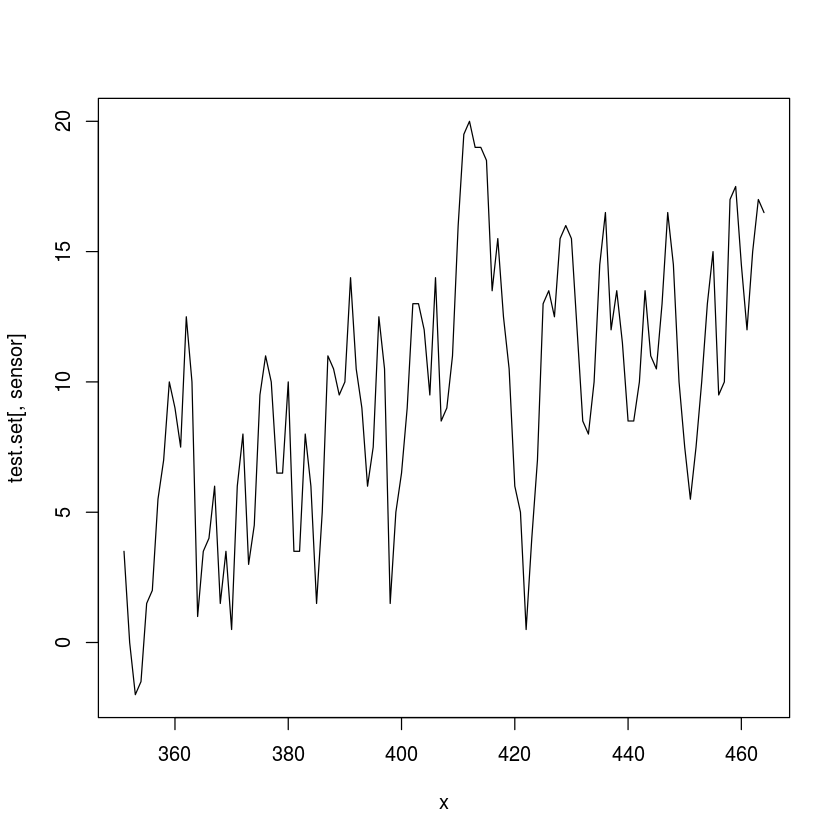

In [12]:
x = seq(from=351,to=(351+nrow(test.set)-1),by=1)
plot(x, test.set[,sensor],type="l")

### Entrenando una Bayesian network con hill-climbing

In [17]:
start_time <- Sys.time()
res = hc(training.set)                 # learn BN structure on training set data 
end_time <- Sys.time()
end_time - start_time

Time difference of 39.64853 secs

Muestro detalles del modelo aprendido

In [18]:
res


  Bayesian network learned via Score-based methods

  model:
   [S14.max][S17.max|S14.max][S14.15hs|S14.max][S18.max|S14.max:S17.max]
   [S2.max|S14.max:S17.max:S18.max][S10.max|S17.max:S2.max]
   [S11.max|S10.max:S2.max][S14.12hs|S10.max:S14.15hs]
   [S4.max|S11.max:S17.max:S2.max][S13.12hs|S14.12hs][S2.12hs|S14.12hs]
   [S17.15hs|S14.max:S17.max:S4.max:S14.15hs][S7.12hs|S13.12hs:S14.12hs:S2.12hs]
   [S9.12hs|S14.12hs:S2.12hs:S7.12hs]
   [S20.12hs|S14.max:S18.max:S2.max:S14.15hs:S13.12hs:S14.12hs:S2.12hs:S7.12hs:S9.12hs]
   [S18.15hs|S14.max:S18.max:S14.15hs:S17.15hs:S14.12hs:S20.12hs]
   [S15.12hs|S13.12hs:S14.12hs:S20.12hs:S9.12hs]
   [S10.15hs|S10.max:S11.max:S17.max:S18.max:S14.15hs:S18.15hs]
   [S16.15hs|S10.max:S2.max:S14.15hs:S17.15hs:S18.15hs]
   [S12.15hs|S10.15hs:S14.15hs:S18.15hs:S14.12hs:S15.12hs:S2.12hs:S7.12hs]
   [S13.15hs|S12.15hs:S14.15hs:S17.15hs:S18.15hs:S13.12hs:S14.12hs:S9.12hs]
   [S12.max|S10.max:S14.max:S18.max:S10.15hs:S12.15hs:S13.15hs:S14.15hs:S17.15hs:S18.

In [19]:
start_time <- Sys.time()
fitted = bn.fit(res, training.set)     # learning of parameters
end_time <- Sys.time()
end_time - start_time

Time difference of 0.09431005 secs

In [20]:
fitted[sensor]

$S11.min_T

  Parameters of node S11.min_T (Gaussian distribution)

Conditional density: S11.min_T | S14.max + S17.max + S7.media + S14.min + S15.min + S1.15hs + S9.15hs + Est.humedad_min + Est.temp_min
Coefficients:
    (Intercept)          S14.max          S17.max         S7.media  
     -9.4473232        0.7840339       -0.5564156        0.3765119  
        S14.min          S15.min          S1.15hs          S9.15hs  
     -1.6007967        1.9113109        0.6021028       -0.6767216  
Est.humedad_min     Est.temp_min  
      0.0527125        0.2034148  
Standard deviation of the residuals: 2.180717 


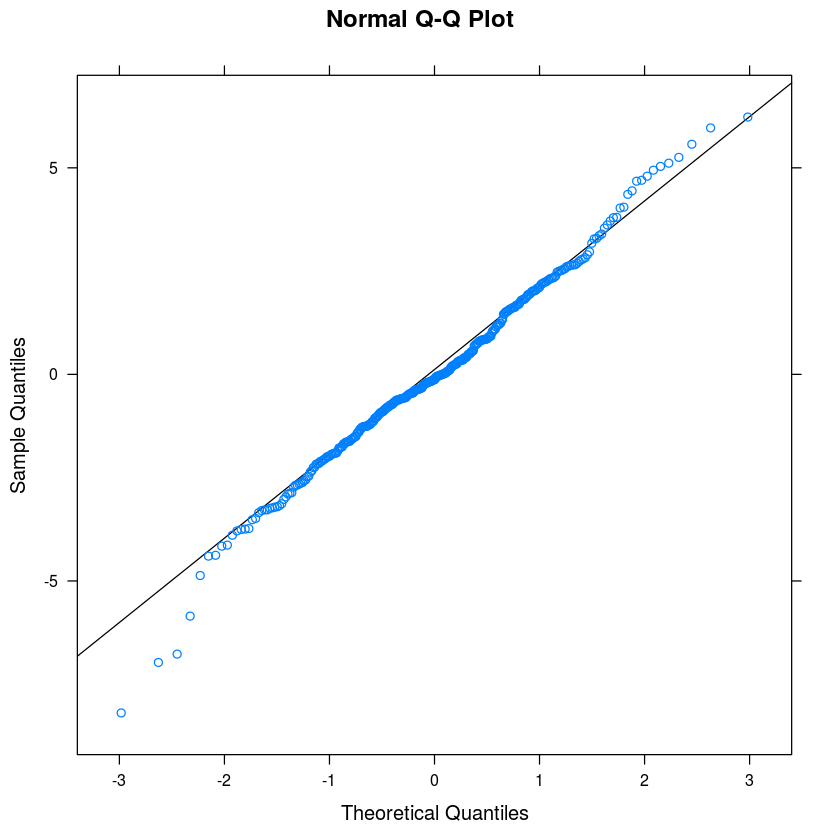

In [24]:
bn.fit.qqplot(fitted$S11.min_T)

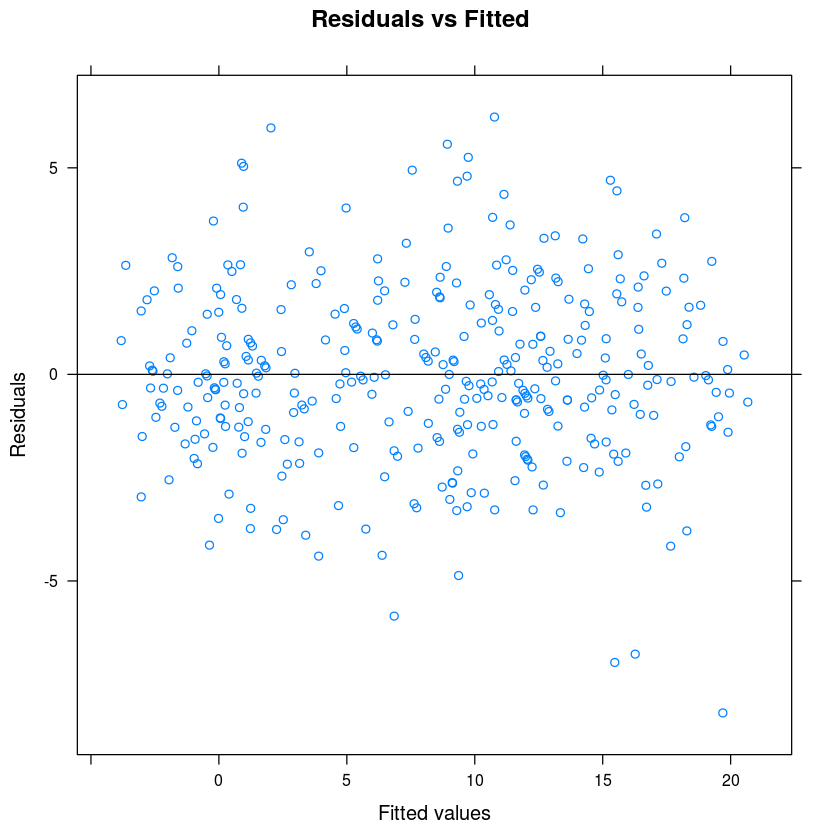

In [25]:
bn.fit.xyplot(fitted$S11.min_T) #pred_sensores

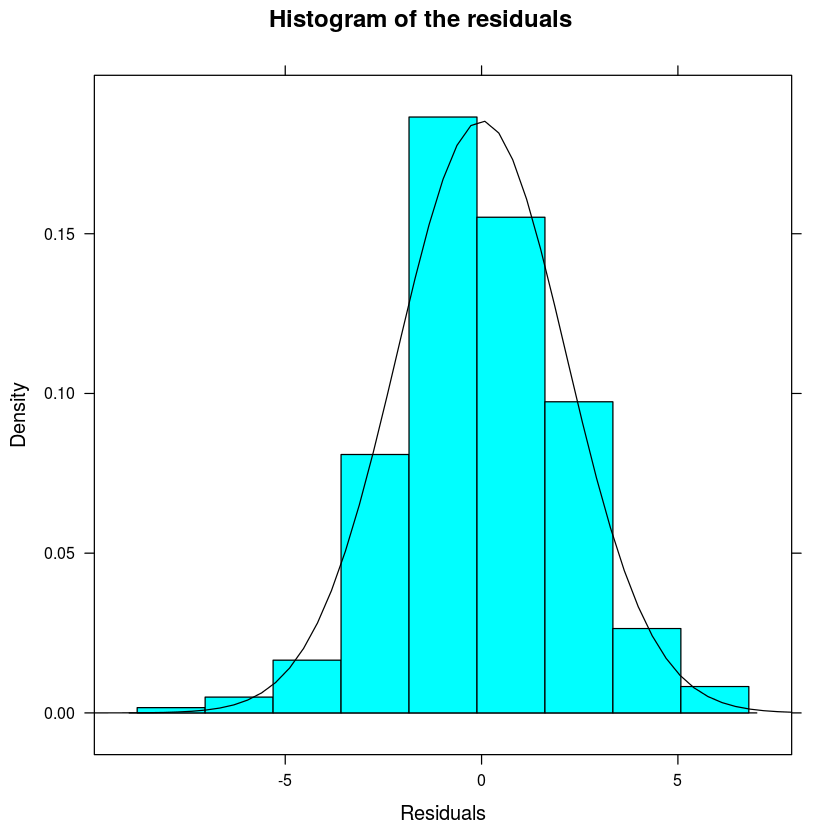

In [26]:
bn.fit.histogram(fitted$S11.min_T)

### Visualizando la matriz de adyacencia

In [27]:
#matriz de adyacencia
print(amat(res))

                S10.max S11.max S12.max S13.max S14.max S15.max S16.max S17.max
S10.max               0       1       1       0       0       1       0       0
S11.max               0       0       0       1       0       1       0       0
S12.max               0       0       0       1       0       1       0       0
S13.max               0       0       0       0       0       1       1       0
S14.max               0       0       1       1       0       0       1       1
S15.max               0       0       0       0       0       0       0       0
S16.max               0       0       0       0       0       0       0       0
S17.max               1       0       0       0       0       0       0       0
S18.max               0       0       1       1       0       0       1       0
S19.max               0       0       0       0       0       0       0       0
S1.max                0       0       0       0       0       0       0       0
S20.max               0       0       0 

### Markov blanket 

In [32]:
for(i in 1:length(colnames(df)))
{
    cat("Markov blanket of ",colnames(df)[i],"\n")
    print(mb(res,colnames(df)[i]))
}

# pregunto por el markov blanket de S14.min
# mb(res,"S14.min_T")

Markov blanket of  S10.max 
 [1] "S11.max"   "S12.max"   "S13.max"   "S14.max"   "S15.max"   "S16.max"  
 [7] "S17.max"   "S18.max"   "S19.max"   "S1.max"    "S2.max"    "S4.max"   
[13] "S5.max"    "S6.max"    "S7.max"    "S8.max"    "S9.max"    "S10.media"
[19] "S12.media" "S14.media" "S15.media" "S16.media" "S17.media" "S1.media" 
[25] "S20.media" "S2.media"  "S6.media"  "S7.media"  "S10.15hs"  "S11.15hs" 
[31] "S12.15hs"  "S13.15hs"  "S14.15hs"  "S15.15hs"  "S16.15hs"  "S17.15hs" 
[37] "S18.15hs"  "S19.15hs"  "S1.15hs"   "S20.15hs"  "S2.15hs"   "S5.15hs"  
[43] "S9.15hs"   "S10.12hs"  "S11.12hs"  "S12.12hs"  "S13.12hs"  "S14.12hs" 
[49] "S15.12hs"  "S19.12hs"  "S1.12hs"   "S20.12hs"  "S2.12hs"   "S4.12hs"  
[55] "S6.12hs"   "S7.12hs"   "S9.12hs"   "S10.18hs"  "S18.18hs"  "S19.18hs" 
Markov blanket of  S11.max 
 [1] "S10.max"         "S12.max"         "S13.max"         "S14.max"        
 [5] "S15.max"         "S16.max"         "S17.max"         "S18.max"        
 [9] "S19.max"      

In [33]:
mb(res,"S11.min_T")

[1] "S14.max"         "S17.max"         "S7.media"        "S14.min"        
[5] "S15.min"         "S1.15hs"         "S9.15hs"         "Est.humedad_min"
[9] "Est.temp_min"

### Probrando predecir valores

In [34]:
pred = predict(fitted, sensor, test.set)  # predicts the value of node sensor given test set
cbind(pred, real=test.set[, sensor])           # compare the actual and predicted


pred,real
4.52778131,3.5
2.38133446,0.0
0.12543696,-2.0
-0.69370230,-1.5
0.07251252,1.5
2.03329857,2.0
4.27482727,5.5
7.59651079,7.0
7.66748877,10.0
10.43693237,9.0


In [35]:
accuracy(f = pred, x = test.set[, sensor])


,ME,RMSE,MAE,MPE,MAPE
Test set,-0.08879048,2.201059,1.792277,-Inf,Inf



* ME: Mean Error
* RMSE: Root Mean Squared Error
* MAE: Mean Absolute Error
* MPE: Mean Percentage Error
* MAPE: Mean Absolute Percentage Error


In [ ]:
# TODO realizar queries sobre la red bayesiana, por ejemplo, dado ciertos valores de algunas variables, 
# cuan probable es que otras variables tomen ciertos valores

### Caso de uso de si.hiton.pc para visualizar Markov blanket

In [36]:
start_time <- Sys.time()
res2 = si.hiton.pc(training.set,alpha = 0.1) # <-- it takes a while running...
end_time <- Sys.time()
end_time - start_time


Time difference of 12.08044 secs

In [42]:
mb(res2,sensor)

character(0)

In [43]:
amat(res2)

,S10.max,S11.max,S12.max,S13.max,S14.max,S15.max,S16.max,S17.max,S18.max,S19.max,⋯,S7.18hs,S8.18hs,S9.18hs,Est.humedad_min,Est.humedad_med,Est.humedad_max,Est.temp_min,Est.temp_max,Est.temp_med,S11.min_T
S10.max,0,0,1,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
S11.max,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
S12.max,1,0,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
S13.max,0,0,1,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
S14.max,0,0,0,0,0,0,0,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
S15.max,0,0,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
S16.max,0,0,0,0,0,0,0,1,1,1,⋯,0,0,0,0,0,0,0,0,0,0
S17.max,1,0,0,0,1,0,1,0,1,0,⋯,0,0,0,0,0,0,0,0,0,0
S18.max,0,0,0,0,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
S19.max,0,1,0,0,0,1,1,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
